In [1]:
%load_ext autoreload

In [2]:
%autoreload 1

In [3]:
import glob
import numpy as np
from rich.pretty import pprint
import matplotlib.pyplot as plt
import matplotlib
import hist
from hist import Hist
import mplhep as hep
import ROOT
import iminuit
import iminuit.cost
import iminuit.util

Welcome to JupyROOT 6.26/04


In [4]:
%aimport fit_utils
%aimport barlow_beeston

In [5]:
matplotlib.rcParams.update({'figure.max_open_warning': 0})
matplotlib.rcParams['figure.facecolor'] = 'white'
plt.style.use(hep.style.CMS)
np.set_printoptions(suppress=True, precision=1)

In [8]:
plots_CR_cb = fit_utils.loader('CR_cb')
plots_CR_prompt = fit_utils.loader('CR_prompt')
plots_SR = fit_utils.loader('SR')

In [9]:
processes = [
    #'VVV_2018',
    #'ttZJets_2018',
    #'WJets_all_2018',
    #'ST_2018',
    'VV_2018',
    'TTJets_2018',
    'DY_NLO_all_2018',
    'QCD_Pt_MuEnriched_2018',
]
k_factor_names_dict = {
    'VVV_2018': 'k_VVV',
    'ttZJets_2018': 'k_ttZ',
    'WJets_all_2018': 'k_WJets',
    'ST_2018': 'k_ST',
    'VV_2018': 'k_VV',
    'TTJets_2018': 'k_TT',
    'DY_NLO_all_2018': 'k_DY',
    'QCD_Pt_MuEnriched_2018': 'k_QCD',
}
k_factor_names_list = [k_factor_names_dict[p] for p in processes]

In [8]:
n_prompt_full, templates_prompt_full = fit_utils.prepare_histograms(
    plots_CR_prompt, processes, nMuon=None
)
n_cb_full, templates_cb_full = fit_utils.prepare_histograms(
    plots_CR_cb, processes, nMuon=None
)

In [10]:
nMuon=1
n_prompt_1, templates_prompt_1 = fit_utils.prepare_histograms(
    plots_CR_prompt, processes, nMuon=nMuon
)
n_cb_1, templates_cb_1 = fit_utils.prepare_histograms(
    plots_CR_cb, processes, nMuon=nMuon
)
nMuon=2
n_prompt_2, templates_prompt_2 = fit_utils.prepare_histograms(
    plots_CR_prompt, processes, nMuon=nMuon
)
n_cb_2, templates_cb_2 = fit_utils.prepare_histograms(
    plots_CR_cb, processes, nMuon=nMuon
)
nMuon=3
n_prompt_3, templates_prompt_3 = fit_utils.prepare_histograms(
    plots_CR_prompt, processes, nMuon=nMuon
)
n_cb_3, templates_cb_3 = fit_utils.prepare_histograms(
    plots_CR_cb, processes, nMuon=nMuon
)
nMuon=4
n_prompt_4, templates_prompt_4 = fit_utils.prepare_histograms(
    plots_CR_prompt, processes, nMuon=nMuon
)
n_cb_4, templates_cb_4 = fit_utils.prepare_histograms(
    plots_CR_cb, processes, nMuon=nMuon
)

In [13]:
nMuon=2
xe_CR_prompt, n_CR_prompt, t_CR_prompt_ndf, vt_CR_prompt_ndf, t_CR_prompt_df, vt_CR_prompt_df = fit_utils.get_data(
    plots_CR_prompt, processes, nMuon=nMuon
)
xe_CR_cb, n_CR_cb, t_CR_cb_ndf, vt_CR_cb_ndf, t_CR_cb_df, vt_CR_cb_df = fit_utils.get_data(
    plots_CR_cb, processes, nMuon=nMuon
)
xe_SR, n_SR, t_SR_ndf, vt_SR_ndf, t_SR_df, vt_SR_df = fit_utils.get_data(plots_SR, processes, nMuon=nMuon)

IndexError: Wrong number of indices for histogram

In [9]:
fit_utils.print_details(n_CR_cb, t_CR_cb_ndf+t_CR_cb_df, vt_CR_cb_ndf+vt_CR_cb_df, processes)

Data values:


array([ 2234.,  1871.,  1358.,  1026.,   864.,  2084.,  2378.,  2336.,
│   │   2848.,  2848.,  3005.,  2908.,  2711.,  2334.,  1979.,  1707.,
│   │   1302.,   980.,   731.,   531.,   368.,   246.,   157.,    94.,
│   │     48.,    28.,    17.,    16.,     4.,     3.,  7330.,  9383.,
│      11275., 13305., 11291.,  9069.,  7054.,  5257.,  4019.,  2837.,
│   │   2010.,  1369.,   890.,   565.,   369.,   193.,   112.,    55.,
│   │     45.,    13.,    11.,     3.,     2.,     1.,     1.,     1.,
│   │      0.,     0.,     0.,     0.,  2698.,  3734.,  4475.,  5088.,
│   │   4825.,  4250.,  4712.,  4722.,  4451.,  4231.,  4238.,  4412.,
│   │   4730.,  4436.,  4260.,  4742.,  5184.,  4546.,  3953.,  2773.])

MC values:


array([[    0. ,     0. ,     0. ,     0. ,     0. ,     0. ,     0.1,
│   │   │   0.3,     0.5,     0.9,     2. ,     3.8,     8.7,    15.8,
│   │      30.3,    51.5,    73.2,    86.7,    88.6,    75. ,    58.1,
│   │      42.4,    30.1,    18.9,    11.7,     7.4,     3.5,     2. ,
│   │   │   1.1,     0.6,    28.8,    50.9,    74. ,    99.5,   115.1,
│   │     114.1,   108.3,   104.3,    99.4,    90.3,    79.2,    66.7,
│   │      55. ,    43.4,    33.3,    23.9,    15.8,    10.8,     6.5,
│   │   │   3.8,     2. ,     0.9,     0.4,     0.1,     0.1,     0.1,
│   │   │   0. ,     0. ,     0. ,     0. ,    17.8,    27.9,    39.4,
│   │      54.2,    61. ,    66.9,    76.9,    87.6,    89.4,    89. ,
│   │      90. ,    88.1,    88.8,    77.7,    67.7,    62.3,    54.5,
│   │      40.4,    29.3,    18. ],
│      [    2. ,     1.7,     1. ,     0.9,     1.5,     1.3,     2.4,
│   │   │   1.8,     3.4,     4.3,     3.3,     5.3,     6.4,     7.1,
│   │   │   5.4,     5.3,     4.9,     3.3,     1.6,     1.6,     1.6,
│   │   │   0.6,     0.3,     0.5,     0. ,     0.1,     0.1,     0. ,
│   │   │   0. ,     0.1,    10.8,    12.1,    18.6,    14.9,    15.7,
│   │      13. ,    11.1,    12. ,     7.7,     7.1,     4.5,     3.7,
│   │   │   2.6,     2.9,     2.3,     0.9,     0.7,     0.1,     0.1,
│   │   │   0.2,     0.3,     0. ,     0. ,     0. ,     0. ,     0. ,
│   │   │   0. ,     0. ,     0. ,     0. ,     4.2,     5.1,     8. ,
│   │   │   6.8,     7.9,     6.5,     6.5,     7.5,     7.4,     9.7,
│   │   │   6.9,     8.9,     8.7,     8. ,     6.2,     8.1,     7.1,
│   │   │   7.3,     6.1,     4.2],
│      [ 2934.1,  2793.3,  2424.6,  1741.3,  1336.2,  3151.2,  3295.7,
│   │    3724.8,  4197.5,  4169.3,  4554.7,  3899.3,  3564.3,  3051.2,
│   │    2617. ,  2016.5,  1569.6,  1168.5,   811.1,   557.9,   360.5,
│   │     221.5,   144. ,    83.8,    48.1,    26.9,    14. ,     7.3,
│   │   │   3.5,     2.9, 10538.2, 11707.3, 14408.5, 17546. , 16311.1,
│   │   13671.2,  9985.5,  7720.1,  5297.1,  4122. ,  2577.1,  1898.5,
│   │    1334.4,   727.9,   475.1,   323.8,   179.5,   106.3,    48.2,
│   │      25.3,    11.8,     5.8,     3.2,     1.1,     0.6,     0.2,
│   │   │   0.1,     0. ,     0. ,     0. ,  4281.6,  5191.5,  6633.7,
│   │    8403.9,  7422.2,  5786.3,  6597. ,  6779.7,  5240.6,  5602.5,
│   │    5105.9,  5660.5,  5855.2,  6104.5,  4934. ,  6966.8,  6995.5,
│   │    6199.3,  5050.9,  4214.7]])

MC variances:


array([[     0. ,      0. ,      0. ,      0. ,      0. ,      0. ,
│   │   │    0. ,      0. ,      0. ,      0. ,      0. ,      0. ,
│   │   │    0.1,      0.2,      0.3,      0.5,      0.8,      1. ,
│   │   │    1.1,      1. ,      0.9,      0.7,      0.5,      0.3,
│   │   │    0.2,      0.1,      0.1,      0. ,      0. ,      0. ,
│   │   │    0.4,      0.6,      0.9,      1.3,      1.4,      1.4,
│   │   │    1.4,      1.3,      1.2,      1.1,      1. ,      0.8,
│   │   │    0.7,      0.6,      0.4,      0.3,      0.2,      0.1,
│   │   │    0.1,      0. ,      0. ,      0. ,      0. ,      0. ,
│   │   │    0. ,      0. ,      0. ,      0. ,      0. ,      0. ,
│   │   │    0.2,      0.4,      0.5,      0.7,      0.8,      0.8,
│   │   │    1. ,      1.1,      1.1,      1.2,      1.2,      1.1,
│   │   │    1.1,      1. ,      0.9,      0.8,      0.7,      0.5,
│   │   │    0.4,      0.2],
│      [     0.3,      0.4,      0.1,      0.1,      0.2,      0.2,
│   │   │    0.4,      0.4,      0.5,      0.6,      0.7,      0.6,
│   │   │    0.7,      0.9,      0.9,      0.6,      0.6,      0.3,
│   │   │    0.1,      0.1,      0.2,      0.1,      0.1,      0. ,
│   │   │    0. ,      0. ,      0. ,      0. ,      0. ,      0. ,
│   │   │    1.4,      2.1,      2.7,      2.6,      2.6,      2. ,
│   │   │    1.4,      1.3,      1.2,      1. ,      0.5,      0.5,
│   │   │    0.3,      0.3,      0.3,      0.1,      0. ,      0. ,
│   │   │    0. ,      0. ,      0. ,      0. ,      0. ,      0. ,
│   │   │    0. ,      0. ,      0. ,      0. ,      0. ,      0. ,
│   │   │    0.6,      0.8,      1.1,      1.2,      1. ,      1.1,
│   │   │    1.2,      1.1,      0.9,      1.2,      0.9,      1.6,
│   │   │    1.2,      0.9,      0.7,      1. ,      1.1,      1. ,
│   │   │    0.8,      0.7],
│      [219546.4, 214209.2, 129191.9,  85063.1,  77204. , 193074.8,
│   │    87249. ,  86817.9,  88876. ,  82206.3,  54983. ,  39336. ,
│   │    28583.7,  17888.6,  12635.7,   6867.6,   3762.8,   1828.2,
│   │      650.1,    319.6,     98.6,     31.3,     11.5,      4.1,
│   │   │    2.7,      0.5,      0.1,      0. ,      0. ,      0. ,
│   │   559078.8, 412698.7, 662716.3, 677433.4, 598396. , 532559.1,
│   │   232571.9, 173434.9,  78703.4,  92768.7,  20268.4,  12325.5,
│   │     7162.9,   2699. ,   2010.6,    740.6,    309.2,    177.9,
│   │   │   42.3,      4.7,      0.8,      0.4,      0.3,      0. ,
│   │   │    0. ,      0. ,      0. ,      0. ,      0. ,      0. ,
│   │   195344.9, 180151.3, 279237.1, 467543.6, 264166.2, 180913.7,
│   │   219417.1, 272601.1,  86656.7, 174020. ,  59772.8, 173908. ,
│   │   200729.6, 156409.7, 111976.7, 197726.6, 281315.3, 193072.6,
│   │   174285. , 196855.6]])

Sum of MC (per process):
TTJets: 3066.9 + 6.2
DY_NLO_all: 349.7 + 7.0
QCD_Pt_MuEnriched: 292542.7 + 3092.4


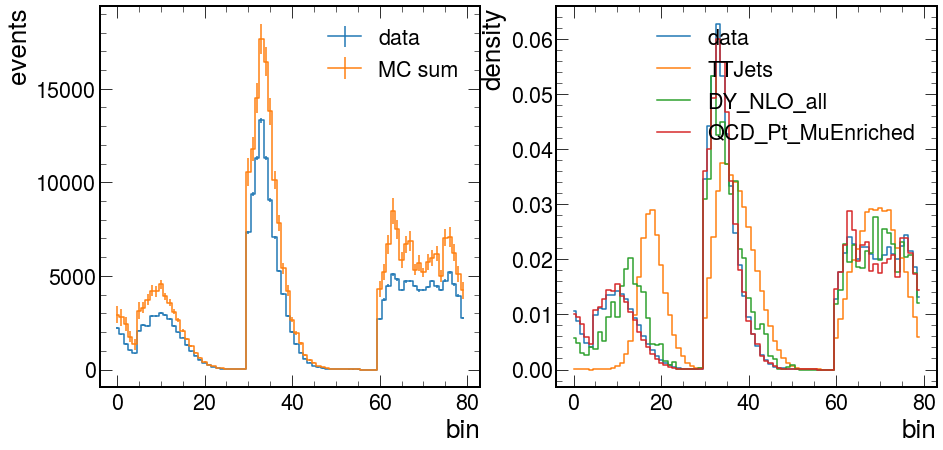

In [10]:
fit_utils.plot_comparisons(n_CR_cb, t_CR_cb_ndf+t_CR_cb_df, vt_CR_cb_ndf+vt_CR_cb_df, processes)

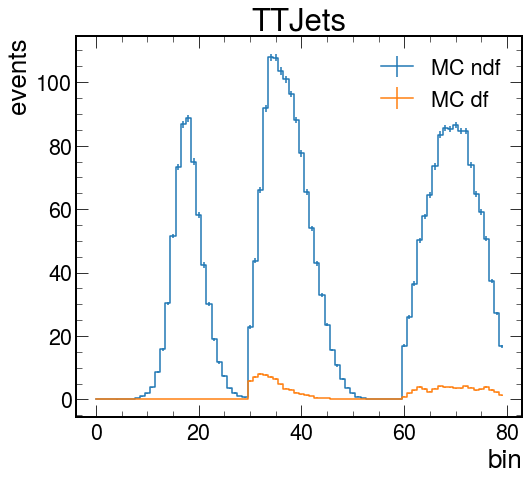

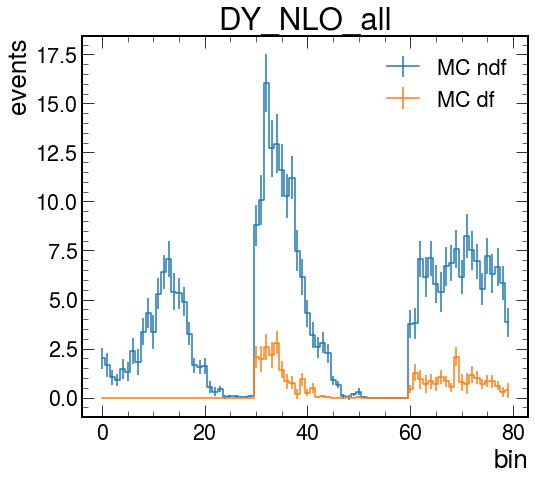

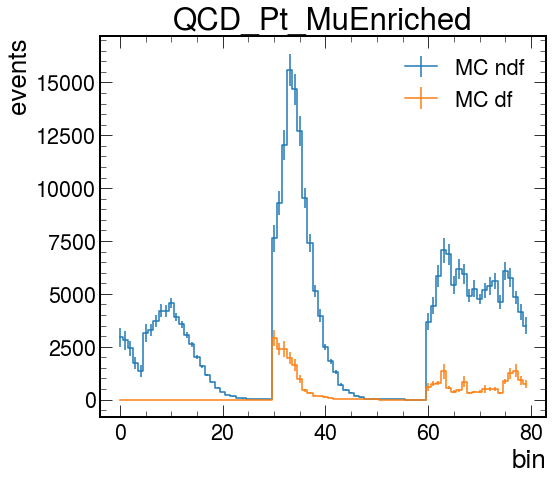

In [12]:
for i, arrays in enumerate(zip(t_CR_cb_ndf, vt_CR_cb_ndf, t_CR_cb_df, vt_CR_cb_df)):
    ti_CR_cb_ndf, vti_CR_cb_ndf, ti_CR_cb_df, vti_CR_cb_df = arrays
    fit_utils.plot_compare_df_vs_ndf(n_CR_cb, ti_CR_cb_ndf, vti_CR_cb_ndf, ti_CR_cb_df, vti_CR_cb_df, processes[i][:-5])

### SImultaneous fit

In [13]:
regions = ['CR_prompt_full', 'CR_cb_full']
data = [n_prompt_full, n_cb_full]
templates = [templates_prompt_full, templates_cb_full]
start = np.ones(len(processes)+1, dtype=np.float64)
c = barlow_beeston.BBlite_histograms(regions, data, templates)
m = iminuit.Minuit(c, start, name=k_factor_names_list+['S_decay'])
m.limits = (0, None)
m.migrad(ncall=10000)
m.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 530.4 (χ²/ndof = 3.4)      │              Nfcn = 253              │
│ EDM = 2.01e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬─────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name    │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼─────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ k_VV    │    0.0    │    0.5    │            │            │    0    │         │       │
│ 1 │ k_TT    │   1.21    │   0.05    │            │            │    0    │         │       │
│ 2 │ k_DY    │   0.914   │   0.019   │            │            │    0    │         │       │
│ 3 │ k_QCD   │   0.727   │   0.005   │            │            │    0    │         │       │
│ 4 │ S_decay │   1.20    │   0.06    │            │            │    0    │         │       │
└───┴─────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────────┬───────────────────────────────────────────────────┐
│         │      k_VV      k_TT      k_DY     k_QCD   S_decay │
├─────────┼───────────────────────────────────────────────────┤
│    k_VV │  2.54e-09   -2.1e-9   -2.7e-9    0.1e-9   -0.4e-9 │
│    k_TT │   -2.1e-9   0.00269   -0.8e-3 -0.111e-3    0.0007 │
│    k_DY │   -2.7e-9   -0.8e-3  0.000378  0.024e-3   -0.2e-3 │
│   k_QCD │    0.1e-9 -0.111e-3  0.024e-3  2.14e-05 -0.162e-3 │
│ S_decay │   -0.4e-9    0.0007   -0.2e-3 -0.162e-3   0.00382 │
└─────────┴───────────────────────────────────────────────────┘

In [11]:
regions = ['CR_prompt_1', 'CR_cb_1', 'CR_prompt_2', 'CR_cb_2', 'CR_prompt_3', 'CR_cb_3', 'CR_prompt_4', 'CR_cb_4']
data = [n_prompt_1, n_cb_1, n_prompt_2, n_cb_2, n_prompt_3, n_cb_3, n_prompt_4, n_cb_4]
templates = [
    templates_prompt_1, templates_cb_1, 
    templates_prompt_2, templates_cb_2, 
    templates_prompt_3, templates_cb_3, 
    templates_prompt_4, templates_cb_4
]
start = np.ones(len(processes)+1, dtype=np.float64)
c = barlow_beeston.BBlite_histograms(regions, data, templates)
m = iminuit.Minuit(c, start, name=k_factor_names_list+['S_decay'])
# m.fixto(4, 1)
m.limits = (0, None)
m.migrad(ncall=10000)
m.hesse()

/cvmfs/sft.cern.ch/lcg/views/LCG_102/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/numba/core/dispatcher.py:238: UserWarning: Numba extension module 'awkward.numba' failed to load due to 'ImportError(cannot import name 'NumbaTypeError' from 'numba.core.errors' (/cvmfs/sft.cern.ch/lcg/views/LCG_102/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/numba/core/errors.py))'.
  entrypoints.init_all()


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 240.4                      │              Nfcn = 201              │
│ EDM = 4.03e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬─────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name    │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼─────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ k_VV    │   1.12    │   0.12    │            │            │    0    │         │       │
│ 1 │ k_TT    │   1.10    │   0.08    │            │            │    0    │         │       │
│ 2 │ k_DY    │   0.883   │   0.026   │            │            │    0    │         │       │
│ 3 │ k_QCD   │   0.622   │   0.013   │            │            │    0    │         │       │
│ 4 │ S_decay │   2.29    │   0.15    │            │            │    0    │         │       │
└───┴─────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────────┬──────────────────────────────────────────────┐
│         │     k_VV     k_TT     k_DY    k_QCD  S_decay │
├─────────┼──────────────────────────────────────────────┤
│    k_VV │   0.0155   -0.001  -0.3e-3  0.03e-3   -0.000 │
│    k_TT │   -0.001  0.00654  -1.5e-3 -0.31e-3    0.002 │
│    k_DY │  -0.3e-3  -1.5e-3 0.000649  0.06e-3  -0.5e-3 │
│   k_QCD │  0.03e-3 -0.31e-3  0.06e-3 0.000174 -1.70e-3 │
│ S_decay │   -0.000    0.002  -0.5e-3 -1.70e-3   0.0237 │
└─────────┴──────────────────────────────────────────────┘

(array([0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6,
        0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6,
        0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6,
        0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6]),
 array([0.9, 0.9, 0.9, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
        1. , 1. , 1. , 1. , 1. , 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1,
        1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2,
        1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.3, 1.3]),
 array([[30.8, 29.8, 28.7, ..., 18.9, 19.5, 20. ],
        [29.3, 28.3, 27.3, ..., 17.9, 18.4, 19. ],
        [27.9, 26.8, 25.8, ..., 16.8, 17.4, 18. ],
        ...,
        [17. , 16.4, 15.8, ..., 23.1, 24. , 24.9],
        [17.8, 17.2, 16.6, ..., 24.2, 25.1, 26.1],
        [18.6, 18. , 17.4, ..., 25.4, 26.3, 27.3]]))

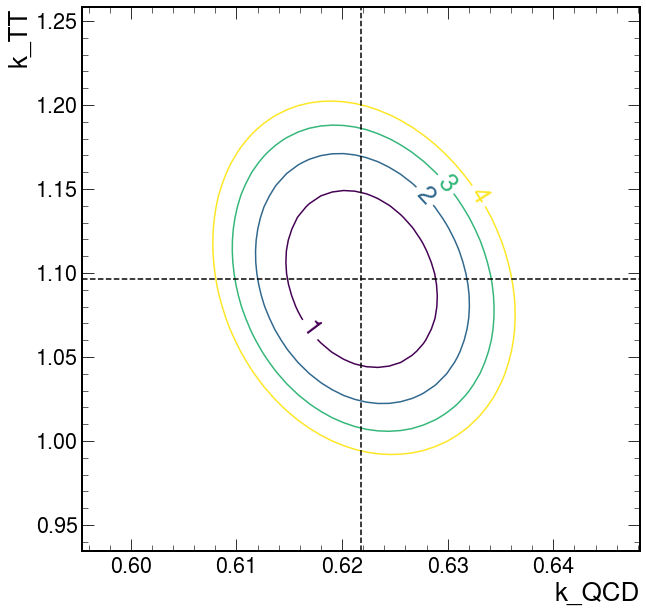

In [13]:
m.draw_contour('k_QCD', 'k_TT')

In [13]:
regions = ['CR_prompt_1', 'CR_cb_1', 'CR_prompt_2', 'CR_cb_2', 'CR_prompt_3', 'CR_cb_3', 'CR_prompt_4', 'CR_cb_4']
data = [n_prompt_1, n_cb_1, n_prompt_2, n_cb_2, n_prompt_3, n_cb_3, n_prompt_4, n_cb_4]
templates = [
    templates_prompt_1, templates_cb_1, 
    templates_prompt_2, templates_cb_2, 
    templates_prompt_3, templates_cb_3, 
    templates_prompt_4, templates_cb_4
]
start = np.ones(len(processes)+1, dtype=np.float64)
c = barlow_beeston.BBlite_histograms(regions, data, templates)
m = iminuit.Minuit(c, start, name=k_factor_names_list+['S_decay'])
m.limits = (0, None)
m.migrad(ncall=10000)
m.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 240.4                      │              Nfcn = 201              │
│ EDM = 4.03e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬─────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name    │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼─────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ k_VV    │   1.12    │   0.12    │            │            │    0    │         │       │
│ 1 │ k_TT    │   1.10    │   0.08    │            │            │    0    │         │       │
│ 2 │ k_DY    │   0.883   │   0.026   │            │            │    0    │         │       │
│ 3 │ k_QCD   │   0.622   │   0.013   │            │            │    0    │         │       │
│ 4 │ S_decay │   2.29    │   0.15    │            │            │    0    │         │       │
└───┴─────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────────┬──────────────────────────────────────────────┐
│         │     k_VV     k_TT     k_DY    k_QCD  S_decay │
├─────────┼──────────────────────────────────────────────┤
│    k_VV │   0.0155   -0.001  -0.3e-3  0.03e-3   -0.000 │
│    k_TT │   -0.001  0.00654  -1.5e-3 -0.31e-3    0.002 │
│    k_DY │  -0.3e-3  -1.5e-3 0.000649  0.06e-3  -0.5e-3 │
│   k_QCD │  0.03e-3 -0.31e-3  0.06e-3 0.000174 -1.70e-3 │
│ S_decay │   -0.000    0.002  -0.5e-3 -1.70e-3   0.0237 │
└─────────┴──────────────────────────────────────────────┘

In [13]:
regions = ['CR_prompt_1', 'CR_cb_1', 'CR_prompt_2', 'CR_cb_2', 'CR_prompt_3', 'CR_cb_3', 'CR_prompt_4', 'CR_cb_4']
data = [n_prompt_1, n_cb_1, n_prompt_2, n_cb_2, n_prompt_3, n_cb_3, n_prompt_4, n_cb_4]
templates = [
    templates_prompt_1, templates_cb_1, 
    templates_prompt_2, templates_cb_2, 
    templates_prompt_3, templates_cb_3, 
    templates_prompt_4, templates_cb_4
]
start = np.ones(len(processes)+1, dtype=np.float64)
c = barlow_beeston.BBlite_histograms(regions, data, templates)
m = iminuit.Minuit(c, start, name=k_factor_names_list+['S_decay'])
m.limits = (0, None)
m.migrad(ncall=10000)
m.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 240.4                      │              Nfcn = 201              │
│ EDM = 4.03e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬─────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name    │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼─────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ k_VV    │   1.12    │   0.12    │            │            │    0    │         │       │
│ 1 │ k_TT    │   1.10    │   0.08    │            │            │    0    │         │       │
│ 2 │ k_DY    │   0.883   │   0.026   │            │            │    0    │         │       │
│ 3 │ k_QCD   │   0.622   │   0.013   │            │            │    0    │         │       │
│ 4 │ S_decay │   2.29    │   0.15    │            │            │    0    │         │       │
└───┴─────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────────┬──────────────────────────────────────────────┐
│         │     k_VV     k_TT     k_DY    k_QCD  S_decay │
├─────────┼──────────────────────────────────────────────┤
│    k_VV │   0.0155   -0.001  -0.3e-3  0.03e-3   -0.000 │
│    k_TT │   -0.001  0.00654  -1.5e-3 -0.31e-3    0.002 │
│    k_DY │  -0.3e-3  -1.5e-3 0.000649  0.06e-3  -0.5e-3 │
│   k_QCD │  0.03e-3 -0.31e-3  0.06e-3 0.000174 -1.70e-3 │
│ S_decay │   -0.000    0.002  -0.5e-3 -1.70e-3   0.0237 │
└─────────┴──────────────────────────────────────────────┘

In [13]:
# np.set_printoptions(suppress=True, precision=3)
# print("Sum of MC (per process):")
# for i, p in enumerate(processes):
#     print(f"\t{p[:-5]}: {np.sum(t_prompt[i]):.1f} + {np.sqrt(np.sum(vt_prompt[i])):.1f}")
print("Fit results:")
for i, p in enumerate(processes): 
    print(f"\t{p}: {round(m.values[i],3)} ± {round(m.errors[i],3)}")
# print("ratios:")
# for i, p in enumerate(processes): 
#     print(f"\t{p}: {round(m.values[i]/np.sum(t_prompt[i]),1)}")

Fit results:
	VV_2018: 1.121 ± 0.125
	TTJets_2018: 1.096 ± 0.081
	DY_NLO_all_2018: 0.883 ± 0.025
	QCD_Pt_MuEnriched_2018: 0.622 ± 0.013


In [14]:
mu, mu_var = [], []
for tt in templates:
    mu_i, mu_var_i = c._pred(tt, [m.values[i] for i in range(len(processes)+1)])
    mu.append(mu_i)
    mu_var.append(mu_var_i)
mu = np.array(mu)
mu_var = np.array(mu_var)
n = np.array([d.values() for d in data])
beta, beta_var = fit_utils.get_nuissances(n, mu, mu_var)

/uscms_data/d3/chpapage/SUEPs/MuonTriggers/muon_branches/SUEPCoffea_dask/plotting/fit_utils.py:382: RuntimeWarning: invalid value encountered in true_divide
  beta_var = np.where(mu > 0, mu_var / mu**2, 0)


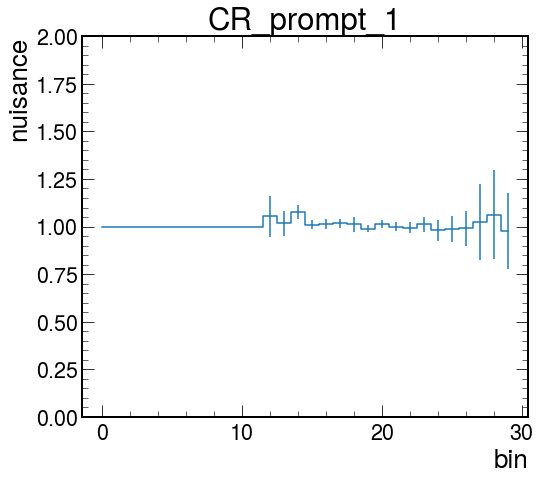

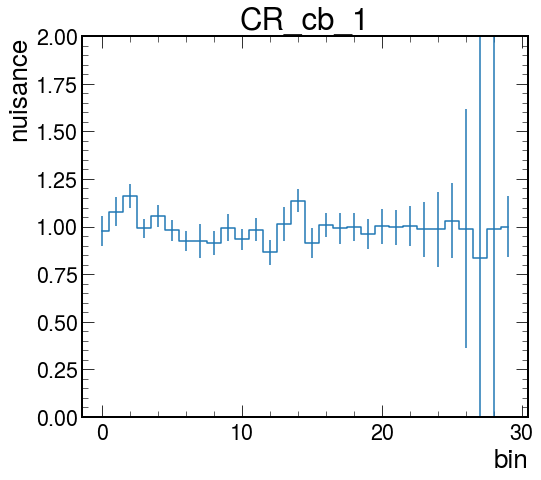

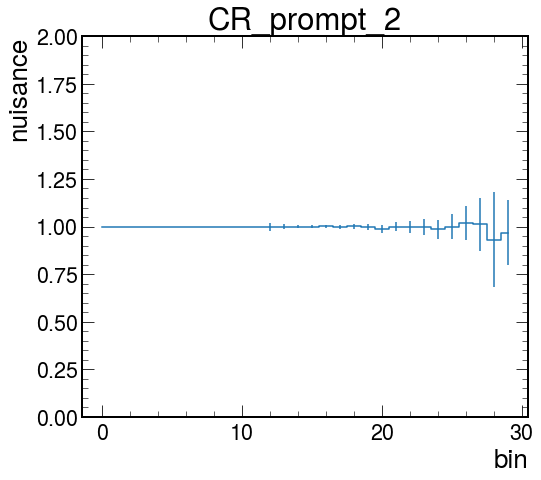

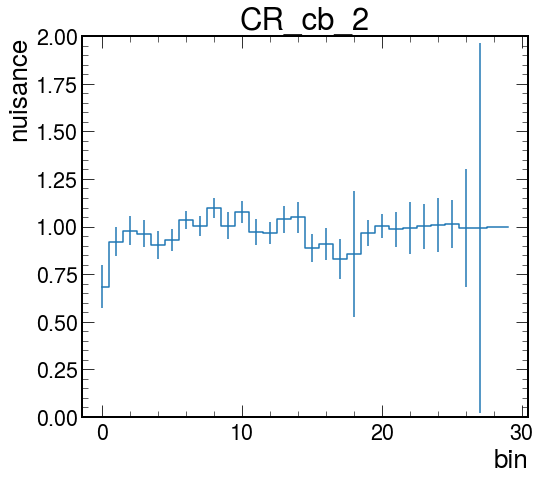

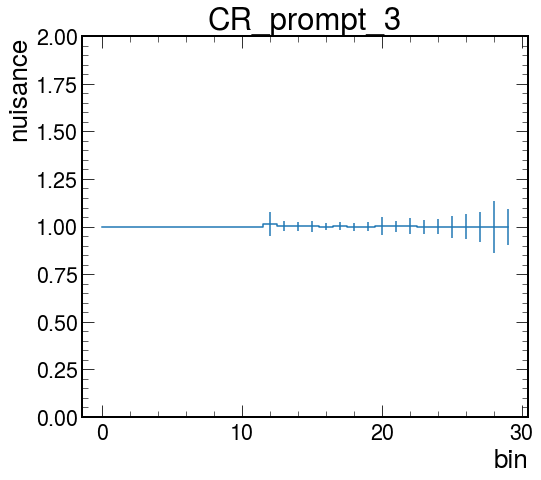

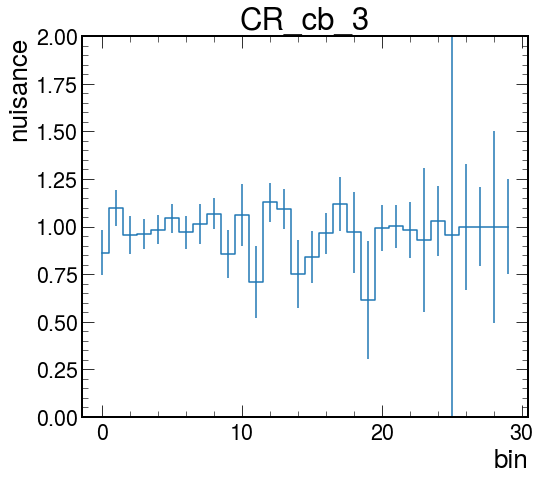

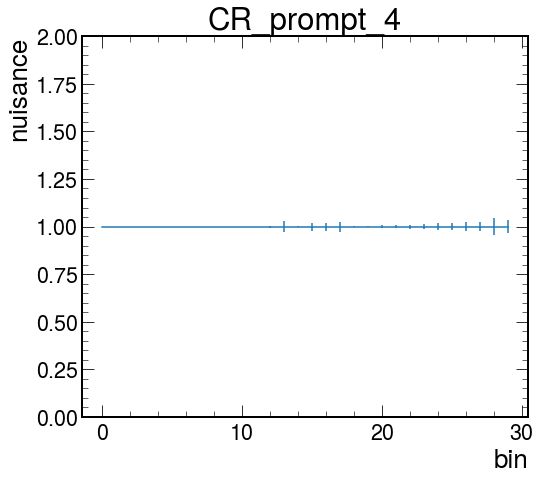

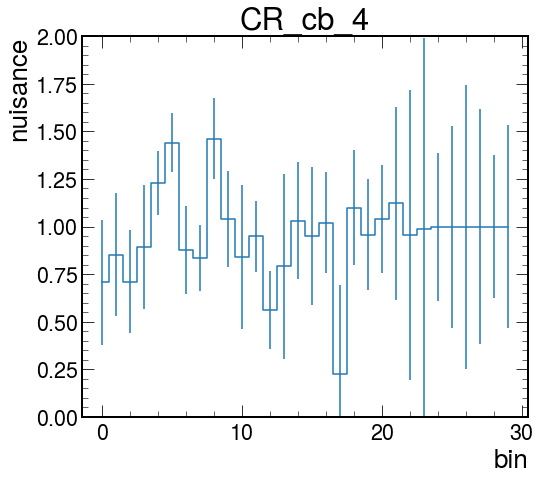

In [15]:
x_vals = range(len(beta[0]))
for i, r in enumerate(regions):
    fig, ax = plt.subplots(1, 1, figsize=(8, 7))
    ax.errorbar(x_vals, beta[i], yerr=np.sqrt(beta_var[i]), drawstyle="steps-mid")
    #ax.lines()
    ax.set_ylim(0,2)
    ax.set_title(r)
    ax.set_xlabel("bin")
    ax.set_ylabel("nuisance")

In [16]:
print(len(templates), 'x', len(templates[0]), 'x', len(templates[0][0]))

8 x 4 x 2


In [17]:
prefit = [
    [
        templates[r][p][0] + templates[r][p][1][:, ::sum] for p in range(len(processes))
    ] for r in range(len(templates))
]

In [18]:
S_decay = m.values[-1]
df_part_scaled = [
    [
        S_decay*templates[r][p][1][:, 1j] + 
        (S_decay**2)*templates[r][p][1][:, 2j] + 
        (S_decay**3)*templates[r][p][1][:, 3j] + 
        (S_decay**4)*templates[r][p][1][:, 4j] for n_muon_df in range(5) for p in range(len(processes))
    ] for r in range(len(templates))
]
postfit = [
    [
        m.values[p] * ( templates[r][p][0] + df_part_scaled[r][p] ) for p in range(len(processes))
    ] for r in range(len(templates))
]

In [19]:
def plot_stack_ratio(data, templates):
    fig = plt.figure(figsize=(10, 10))
    plt.subplots_adjust(bottom=0.15, left=0.17)
    ax1 = plt.subplot2grid((4, 1), (0, 0), rowspan=3)
    ax2 = plt.subplot2grid((4, 1), (3, 0), sharex=ax1)

    # Plot the bkg stack
    hep.histplot(
        templates,
        label=[p.replace("_2018", "") for p in processes],
        stack=True,
        histtype="fill",
        ec="black",
        lw=2,
        ax=ax1,
        zorder=1,
    )

    # Plot the unc hatch for bkg stack
    hist_bkg_total = templates[0].copy().reset()
    for p in range(len(processes)):
        hist_bkg_total += templates[p]
    x_hatch = np.vstack(
        (hist_bkg_total.axes[0].edges[:-1], hist_bkg_total.axes[0].edges[1:])
    ).reshape((-1,), order="F")
    y_hatch1 = np.vstack((hist_bkg_total.values(), hist_bkg_total.values())).reshape(
        (-1,), order="F"
    )
    y_hatch1_unc = np.vstack(
        (np.sqrt(hist_bkg_total.variances()), np.sqrt(hist_bkg_total.variances()))
    ).reshape((-1,), order="F")
    ax1.fill_between(
        x=x_hatch,
        y1=y_hatch1 - y_hatch1_unc,
        y2=y_hatch1 + y_hatch1_unc,
        label="Stat. Unc.",
        step="pre",
        facecolor="none",
        edgecolor=(0, 0, 0, 0.5),
        linewidth=0,
        hatch="///",
        zorder=2,
    )
    hep.histplot(
        data,
        label=["Data"],
        histtype="errorbar",
        mec="black",
        mfc="black",
        ecolor="black",
        ax=ax1,
    )
    plt.setp(ax1.get_xticklabels(), visible=False)
    hep.cms.label(llabel="Preliminary", data=False, lumi=0.57, ax=ax1)
    ax1.set_xlabel("")
    maximum_value = max(np.max(data.values()), np.max(hist_bkg_total.values()))
    accuracy = 10**(np.floor(np.log10(maximum_value)))
    ax1.set_ylim(0, accuracy * round((1.35 * maximum_value) / accuracy) )
    ax1.legend(ncol=2, loc='best')

    # Calculate and plot the ratio
    ratio = np.divide(
        data.values(),
        hist_bkg_total.values(),
        out=np.ones_like(data.values()),
        where=hist_bkg_total.values() != 0,
    )
    ratio_err = np.where(
        hist_bkg_total.values() > 0,
        np.sqrt(
            (hist_bkg_total.values() ** -2) * (data.variances())
            + (data.values() ** 2 * hist_bkg_total.values() ** -4)
            * (hist_bkg_total.variances())
        ),
        0,
    )
    ax2.errorbar(
        data.axes.centers[0],
        ratio,
        yerr=ratio_err,
        color="black",
        fmt="o",
        linestyle="none",
    )

    # Draw a filled hatch area with the relative uncertainty of the MC in the ratio plot.
    mc_rel_unc = np.divide(
        np.sqrt(hist_bkg_total.variances()),
        hist_bkg_total.values(),
        out=np.zeros_like(hist_bkg_total.values()),
        where=hist_bkg_total.values() != 0,
    )
    y_hatch2 = np.vstack(
        (np.ones_like(hist_bkg_total.values()), np.ones_like(hist_bkg_total.values()))
    ).reshape((-1,), order="F")
    y_hatch2_unc = np.vstack((mc_rel_unc, mc_rel_unc)).reshape((-1,), order="F")
    ax2.fill_between(
        x=x_hatch,
        y1=y_hatch2 - y_hatch2_unc,
        y2=y_hatch2 + y_hatch2_unc,
        step="pre",
        facecolor="none",
        edgecolor=(0, 0, 0, 0.5),
        linewidth=0,
        hatch="///",
    )

    ax2.axhline(1, ls="--", color="gray")
    ax2.set_xlabel("bin")
    ax2.set_ylabel("Ratio")
    ax2.set_ylim(0, 2)
    return

CR_prompt_1


/tmp/ipykernel_22051/1960966496.py:71: RuntimeWarning: divide by zero encountered in power
  (hist_bkg_total.values() ** -2) * (data.variances())
/tmp/ipykernel_22051/1960966496.py:71: RuntimeWarning: invalid value encountered in multiply
  (hist_bkg_total.values() ** -2) * (data.variances())
/tmp/ipykernel_22051/1960966496.py:72: RuntimeWarning: divide by zero encountered in power
  + (data.values() ** 2 * hist_bkg_total.values() ** -4)
/tmp/ipykernel_22051/1960966496.py:72: RuntimeWarning: invalid value encountered in multiply
  + (data.values() ** 2 * hist_bkg_total.values() ** -4)


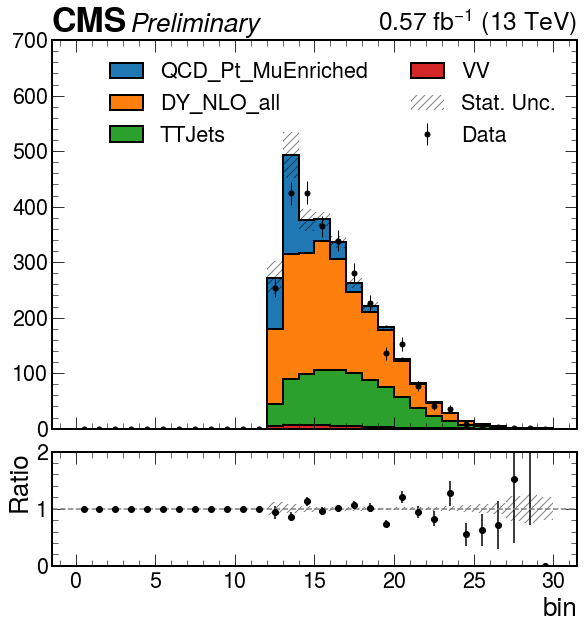

CR_cb_1


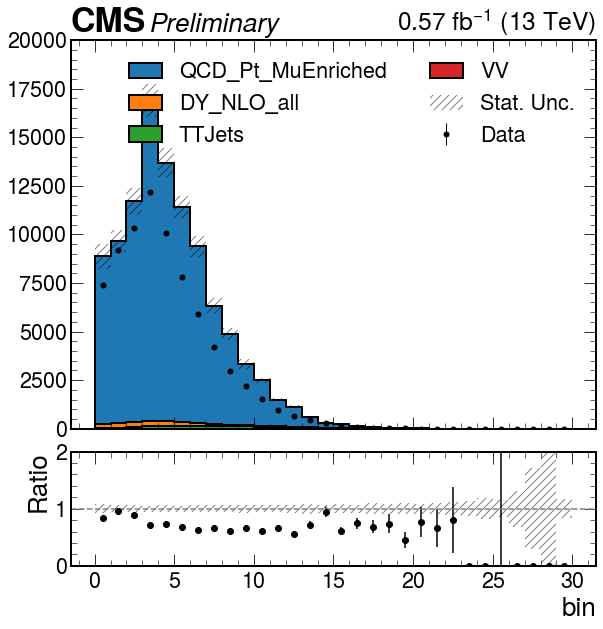

CR_prompt_2


/tmp/ipykernel_22051/1960966496.py:71: RuntimeWarning: divide by zero encountered in power
  (hist_bkg_total.values() ** -2) * (data.variances())
/tmp/ipykernel_22051/1960966496.py:71: RuntimeWarning: invalid value encountered in multiply
  (hist_bkg_total.values() ** -2) * (data.variances())
/tmp/ipykernel_22051/1960966496.py:72: RuntimeWarning: divide by zero encountered in power
  + (data.values() ** 2 * hist_bkg_total.values() ** -4)
/tmp/ipykernel_22051/1960966496.py:72: RuntimeWarning: invalid value encountered in multiply
  + (data.values() ** 2 * hist_bkg_total.values() ** -4)


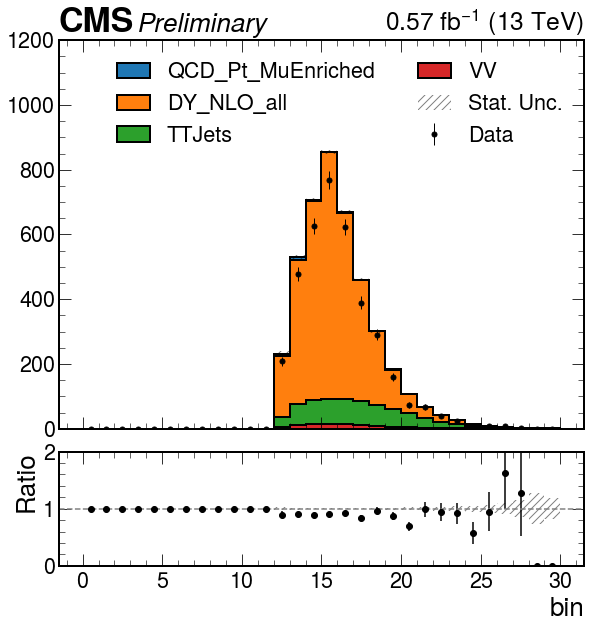

CR_cb_2


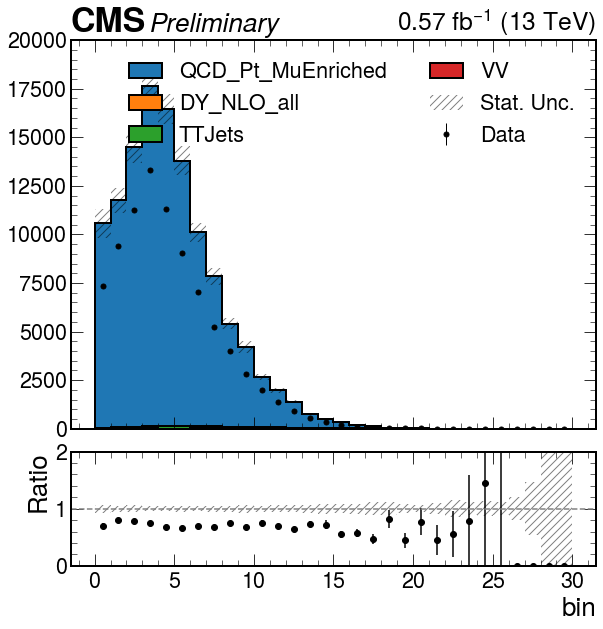

CR_prompt_3


/tmp/ipykernel_22051/1960966496.py:71: RuntimeWarning: divide by zero encountered in power
  (hist_bkg_total.values() ** -2) * (data.variances())
/tmp/ipykernel_22051/1960966496.py:71: RuntimeWarning: invalid value encountered in multiply
  (hist_bkg_total.values() ** -2) * (data.variances())
/tmp/ipykernel_22051/1960966496.py:72: RuntimeWarning: divide by zero encountered in power
  + (data.values() ** 2 * hist_bkg_total.values() ** -4)
/tmp/ipykernel_22051/1960966496.py:72: RuntimeWarning: invalid value encountered in multiply
  + (data.values() ** 2 * hist_bkg_total.values() ** -4)


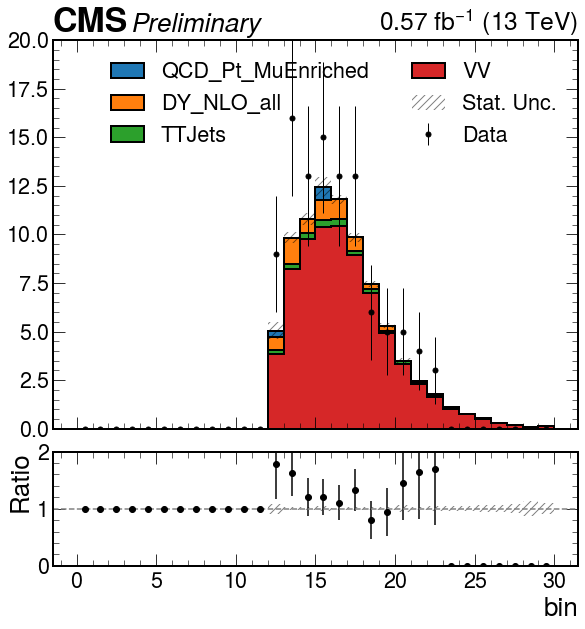

CR_cb_3


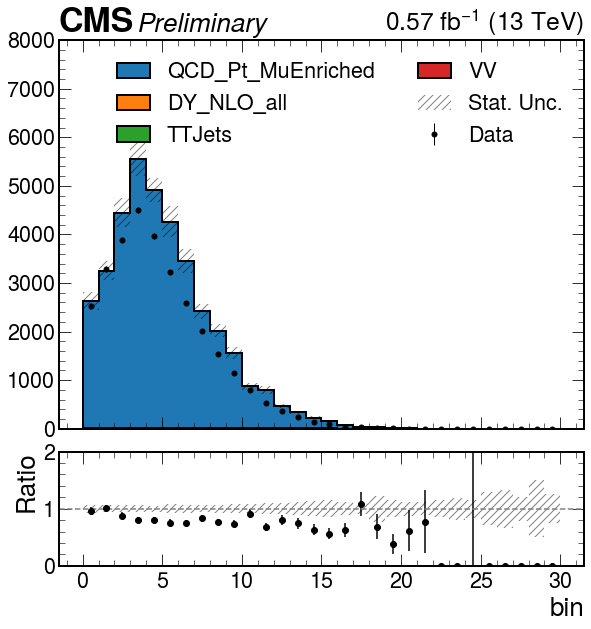

CR_prompt_4


/tmp/ipykernel_22051/1960966496.py:71: RuntimeWarning: divide by zero encountered in power
  (hist_bkg_total.values() ** -2) * (data.variances())
/tmp/ipykernel_22051/1960966496.py:71: RuntimeWarning: invalid value encountered in multiply
  (hist_bkg_total.values() ** -2) * (data.variances())
/tmp/ipykernel_22051/1960966496.py:72: RuntimeWarning: divide by zero encountered in power
  + (data.values() ** 2 * hist_bkg_total.values() ** -4)
/tmp/ipykernel_22051/1960966496.py:72: RuntimeWarning: invalid value encountered in multiply
  + (data.values() ** 2 * hist_bkg_total.values() ** -4)


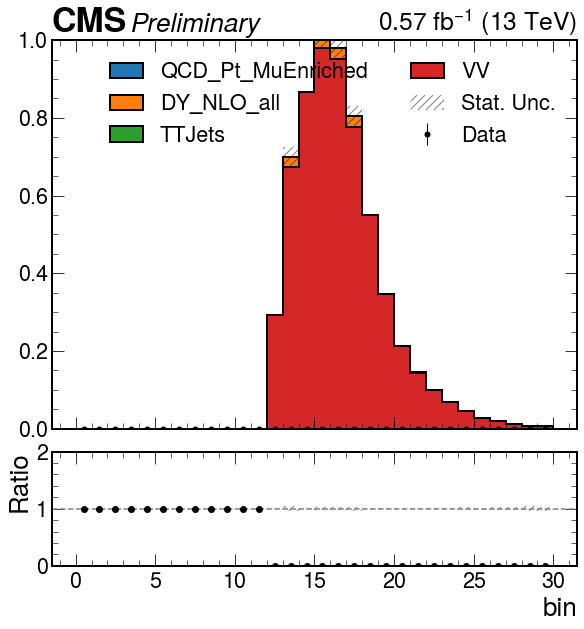

CR_cb_4


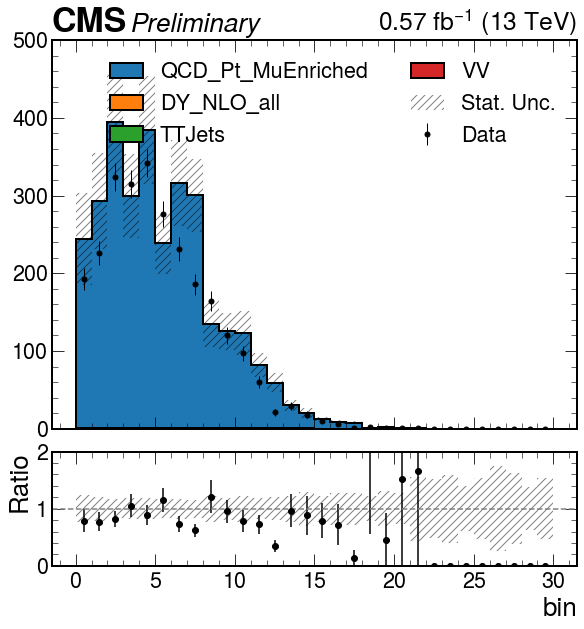

In [20]:
for i, r in enumerate(regions):
    print(r)
    plot_stack_ratio(data[i], prefit[i])
    plt.show()

CR_prompt_1


/tmp/ipykernel_22051/1960966496.py:71: RuntimeWarning: divide by zero encountered in power
  (hist_bkg_total.values() ** -2) * (data.variances())
/tmp/ipykernel_22051/1960966496.py:71: RuntimeWarning: invalid value encountered in multiply
  (hist_bkg_total.values() ** -2) * (data.variances())
/tmp/ipykernel_22051/1960966496.py:72: RuntimeWarning: divide by zero encountered in power
  + (data.values() ** 2 * hist_bkg_total.values() ** -4)
/tmp/ipykernel_22051/1960966496.py:72: RuntimeWarning: invalid value encountered in multiply
  + (data.values() ** 2 * hist_bkg_total.values() ** -4)


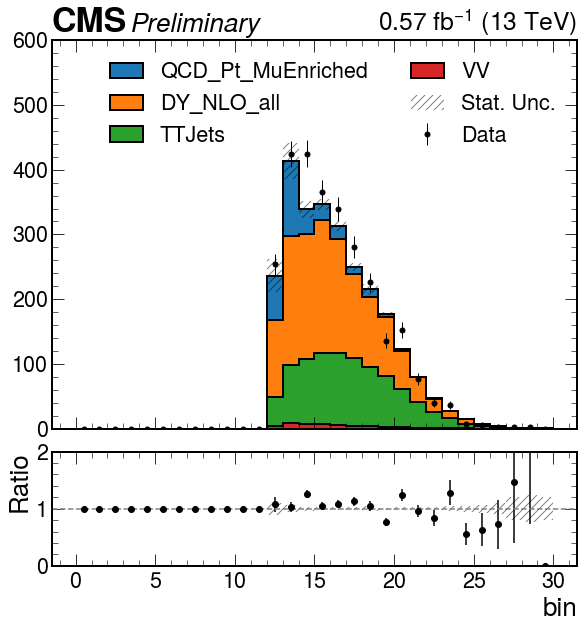

CR_cb_1


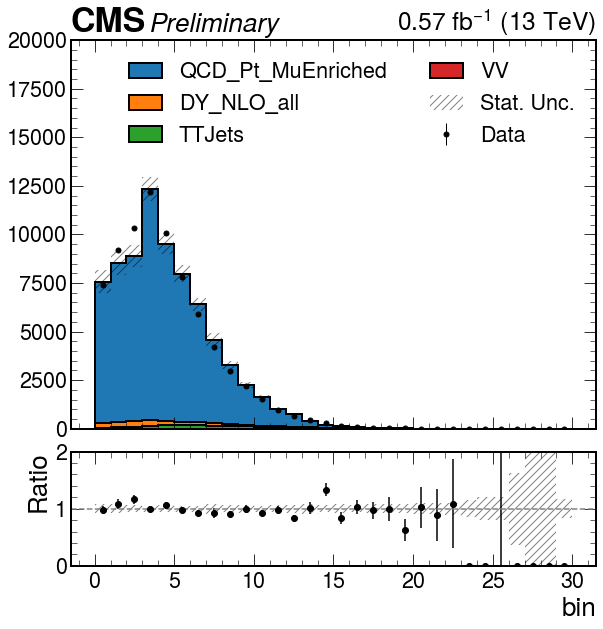

CR_prompt_2


/tmp/ipykernel_22051/1960966496.py:71: RuntimeWarning: divide by zero encountered in power
  (hist_bkg_total.values() ** -2) * (data.variances())
/tmp/ipykernel_22051/1960966496.py:71: RuntimeWarning: invalid value encountered in multiply
  (hist_bkg_total.values() ** -2) * (data.variances())
/tmp/ipykernel_22051/1960966496.py:72: RuntimeWarning: divide by zero encountered in power
  + (data.values() ** 2 * hist_bkg_total.values() ** -4)
/tmp/ipykernel_22051/1960966496.py:72: RuntimeWarning: invalid value encountered in multiply
  + (data.values() ** 2 * hist_bkg_total.values() ** -4)


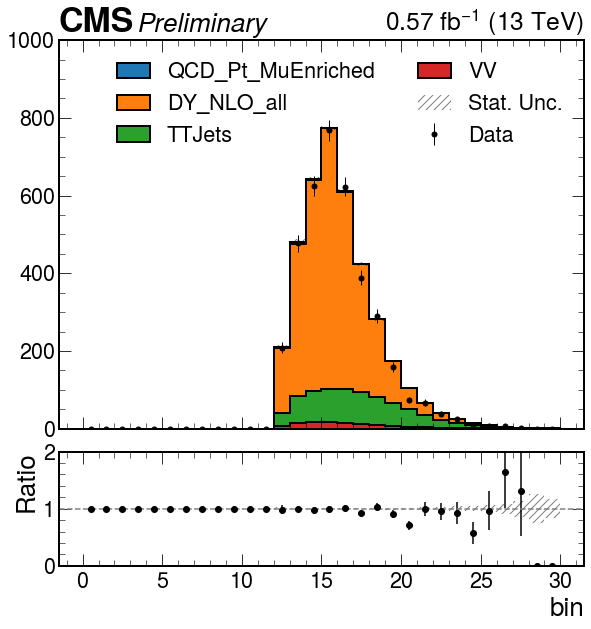

CR_cb_2


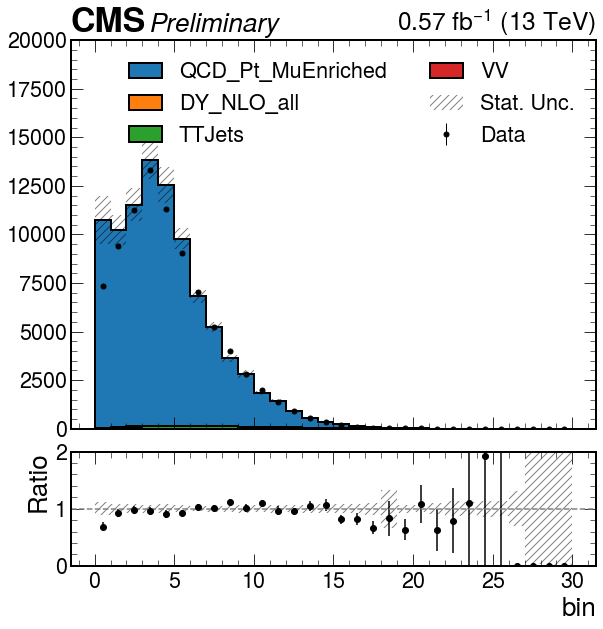

CR_prompt_3


/tmp/ipykernel_22051/1960966496.py:71: RuntimeWarning: divide by zero encountered in power
  (hist_bkg_total.values() ** -2) * (data.variances())
/tmp/ipykernel_22051/1960966496.py:71: RuntimeWarning: invalid value encountered in multiply
  (hist_bkg_total.values() ** -2) * (data.variances())
/tmp/ipykernel_22051/1960966496.py:72: RuntimeWarning: divide by zero encountered in power
  + (data.values() ** 2 * hist_bkg_total.values() ** -4)
/tmp/ipykernel_22051/1960966496.py:72: RuntimeWarning: invalid value encountered in multiply
  + (data.values() ** 2 * hist_bkg_total.values() ** -4)


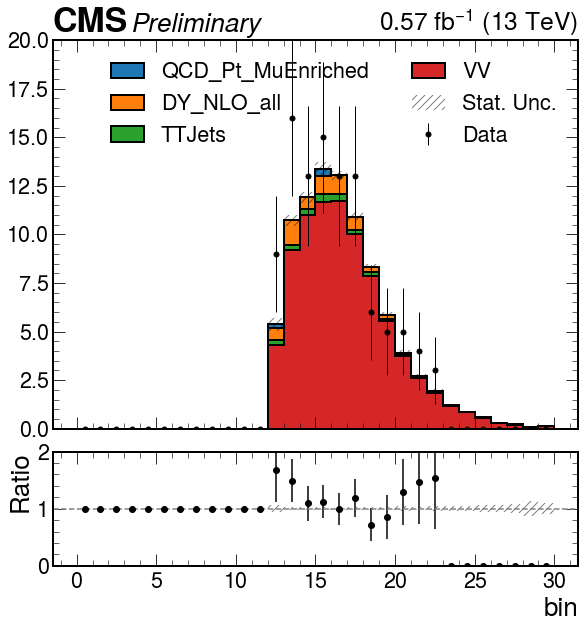

CR_cb_3


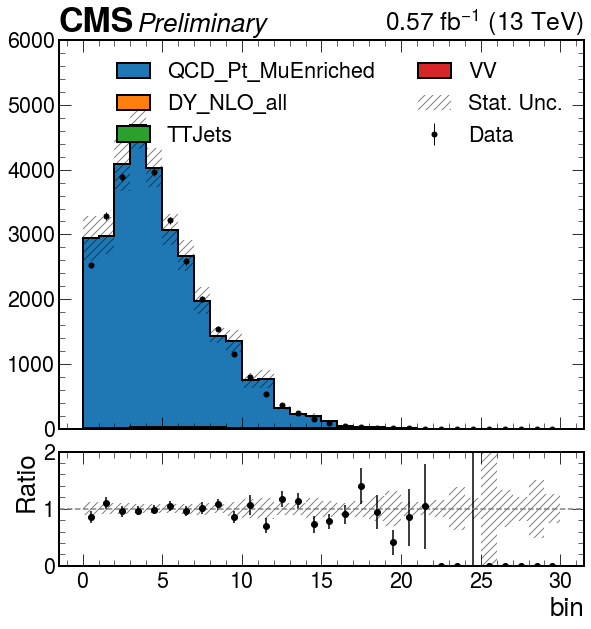

CR_prompt_4


/tmp/ipykernel_22051/1960966496.py:71: RuntimeWarning: divide by zero encountered in power
  (hist_bkg_total.values() ** -2) * (data.variances())
/tmp/ipykernel_22051/1960966496.py:71: RuntimeWarning: invalid value encountered in multiply
  (hist_bkg_total.values() ** -2) * (data.variances())
/tmp/ipykernel_22051/1960966496.py:72: RuntimeWarning: divide by zero encountered in power
  + (data.values() ** 2 * hist_bkg_total.values() ** -4)
/tmp/ipykernel_22051/1960966496.py:72: RuntimeWarning: invalid value encountered in multiply
  + (data.values() ** 2 * hist_bkg_total.values() ** -4)


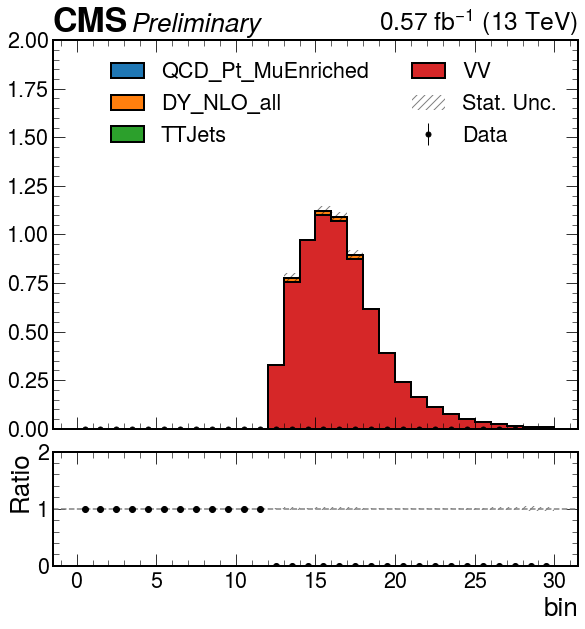

CR_cb_4


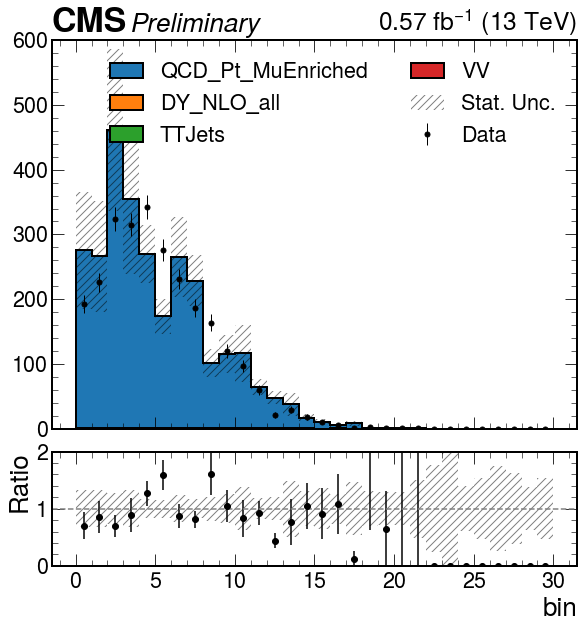

In [21]:
for i, r in enumerate(regions):
    print(r)
    plot_stack_ratio(data[i], postfit[i])
    plt.show()

In [184]:
from jacobi import propagate

In [191]:
m.values

<ValueView k_VV=1.4090772942805896 k_TT=1.0917434230131624 k_DY=0.8835256949656405 k_QCD=0.7208659795713374 S_decay=1.6011702487088262>

In [193]:
m.covariance

,k_VV,k_TT,k_DY,k_QCD,S_decay
k_VV,0.0081,-0.0001 (-0.039),-0.21e-3 (-0.175),0.008e-3 (0.017),-0.000 (-0.009)
k_TT,-0.0001 (-0.039),0.00127,-0.27e-3 (-0.581),-0.064e-3 (-0.319),0.0004 (0.172)
k_DY,-0.21e-3 (-0.175),-0.27e-3 (-0.581),0.000174,0.010e-3 (0.138),-0.06e-3 (-0.078)
k_QCD,0.008e-3 (0.017),-0.064e-3 (-0.319),0.010e-3 (0.138),3.13e-05,-0.221e-3 (-0.646)
S_decay,-0.000 (-0.009),0.0004 (0.172),-0.06e-3 (-0.078),-0.221e-3 (-0.646),0.00373


In [194]:
def first_deriv(parameters):
    output = []
    for par in parameters:
        S_decay = parameters[-1]
        df_part_scaled = [
            [
                S_decay*templates[r][p][1][:, 1j] + 
                (S_decay**2)*templates[r][p][1][:, 2j] + 
                (S_decay**3)*templates[r][p][1][:, 3j] + 
                (S_decay**4)*templates[r][p][1][:, 4j] for n_muon_df in range(5) for p in range(len(processes))
            ] for r in range(len(templates))
        ]
        deriv = [
            [
                par[p] * ( templates[r][p][0] + df_part_scaled[r][p] ) for p in range(len(processes))
            ] for r in range(len(templates))
        ]
        output.append(deriv)
    return output

In [195]:
propagate(lambda p: prediction(p), m.values, m.covariance)

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('float64'), dtype([('value', '<f8'), ('variance', '<f8')])) -> None